# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [ ]:
data_df = pd.read_csv('glass.data', header=None)
X = data_df.iloc[:, 1:10]
y = data_df.iloc[:, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range(1,5):
  clf = KNeighborsClassifier(p=i)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  y_pred = clf.predict(X_test)
  score = accuracy_score(y_test, y_pred)

  print(f'Test Accuracy Score (p={i}): {score}')
  print(f'Train Accuracy Score (p={i}): {clf.score(X_train, y_train)}')
  print(f'Output Probabilities (p={i}): \n{clf.predict_proba(X_test)[:5]}\n')

Test Accuracy Score (p=1): 0.6976744186046512
Train Accuracy Score (p=1): 0.7777777777777778
Output Probabilities (p=1): 
[[0.8 0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.2 0.8 0.  0.  0.  0. ]]

Test Accuracy Score (p=2): 0.6511627906976745
Train Accuracy Score (p=2): 0.7251461988304093
Output Probabilities (p=2): 
[[1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.2 0.8 0.  0.  0.  0. ]]

Test Accuracy Score (p=3): 0.6744186046511628
Train Accuracy Score (p=3): 0.7251461988304093
Output Probabilities (p=3): 
[[0.8 0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]]

Test Accuracy Score (p=4): 0.6511627906976745
Train Accuracy Score (p=4): 0.7192982456140351
Output Probabilities (p=4): 
[[0.8 0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.

Discussion

It seems like everything above p=2 seemed to be fairly similar as far as test and training accuracies, but a definate trend that the higher the p, the lower the test accuracy. The lower the p the better the performance overall.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [ ]:
# Learn magic telescope data
magic_data, meta = arff.loadarff("MagicTelescope.arff.txt")
magic_df = pd.DataFrame(magic_data)
magic_df['class:'] = magic_df['class:'].str.decode('utf-8')
target_column = ['class:']
X = magic_df.drop(columns = target_column)
y = magic_df[target_column]
X_train,X_test, y_train, y_test = train_test_split(X, y)

clf = KNeighborsClassifier(weights=None, n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)

print(f'Test Accuracy Score: {score}')
print(f'Train Accuracy Score: {clf.score(X_train, y_train)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy Score: 0.7882229232386961
Train Accuracy Score: 0.8846126883981773


*Discussion*

It seems to be fairly accurate. It does leave some to be desired tho.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [ ]:
# Train/Predict with normalization
magic_data, meta = arff.loadarff("MagicTelescope.arff.txt")
magic_df = pd.DataFrame(magic_data)
magic_df['class:'] = magic_df['class:'].str.decode('utf-8')
target_column = ['class:']
X = magic_df.drop(columns = target_column)
y = magic_df[target_column]
X_train,X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = KNeighborsClassifier(weights=None, n_neighbors=3)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_pred)

print(f'Test Accuracy Score: {score}')
print(f'Train Accuracy Score: {clf.score(X_train_scaled, y_train)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy Score: 0.840378548895899
Train Accuracy Score: 0.9031195233087977


*Discuss the results of using normalized data vs. unnormalized data*

We had a pretty big jump higher for our normalized data! Mine was about .05 better.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [ ]:
#Train/Precdict with normalization and distance weighting
magic_data, meta = arff.loadarff("MagicTelescope.arff.txt")
magic_df = pd.DataFrame(magic_data)
magic_df['class:'] = magic_df['class:'].str.decode('utf-8')
target_column = ['class:']
X = magic_df.drop(columns = target_column)
y = magic_df[target_column]
X_train,X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
score = accuracy_score(y_test, y_pred)

print(f'Test Accuracy Score: {score}')
print(f'Train Accuracy Score: {clf.score(X_train_scaled, y_train)}')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy Score: 0.8311251314405889
Train Accuracy Score: 0.9043112513144059


Comparison and Discussion

So mine actually did not change all that much, in fact with the weights it arguably performed a little worse.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

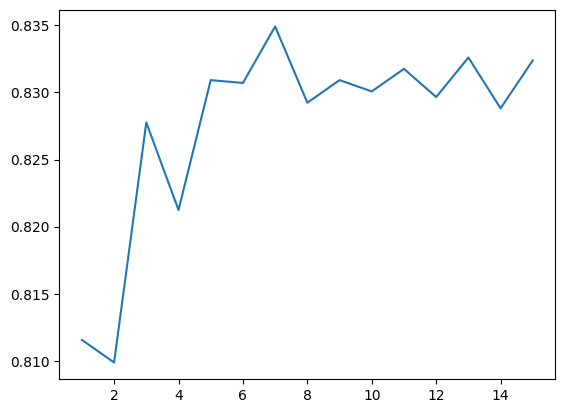

In [ ]:
# Calculate and Graph classification accuracy vs k values
magic_data, meta = arff.loadarff("MagicTelescope.arff.txt")
magic_df = pd.DataFrame(magic_data)
magic_df['class:'] = magic_df['class:'].str.decode('utf-8')
target_column = ['class:']
X = magic_df.drop(columns = target_column)
y = magic_df[target_column]
X_train,X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = list(range(1,16))
accuarcy_scores =[]

for i in k:

  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train_scaled, y_train)

  y_pred = clf.predict(X_test_scaled)
  score = accuracy_score(y_test, y_pred)
  accuarcy_scores.append(score)

plt.plot(k, accuarcy_scores)

*Discussion*

So for mine, I see that the data accuracy really peaks around k=3, then it kinda plataues at k = 9 as far as accuarcy goes

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

*Discuss the innapropriate feature*

As I look at the raw arff file, I see a attribute that is called CHAS and it is labeled as a {0,1} type instead of real like the rest. This would be inappropriate in a regression problem because we can can only use real data.

### 3.2 (15%) - KNN Regression
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [ ]:
# Learn and experiment with housing price prediction data
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

housing_data, meta = arff.loadarff("housing.arff.txt")
housing_df = pd.DataFrame(housing_data)
housing_df = housing_df.drop(columns = "CHAS")
target_column = "MEDV"
X = housing_df.drop(columns = target_column)
y = housing_df[target_column]
X_train,X_test, y_train, y_test = train_test_split(X, y)

clf=KNeighborsRegressor(n_neighbors=3, weights = None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)
score = mean_absolute_error(y_test, y_pred)

print(f'MAE: {score}')
print(f'Score: {clf.score(X_train, y_train)}')

MAE: 4.363779527559054
Score: 0.7883952169571671


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = KNeighborsRegressor(n_neighbors=3, weights = None)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
score = mean_absolute_error(y_test, y_pred)

print(f'MAE: {score}')
print(f'Score: {clf.score(X_train_scaled, y_train)}')

MAE: 2.5335958005249344
Score: 0.9296858342398657


In [ ]:
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
score = mean_absolute_error(y_test, y_pred)

print(f'MAE: {score}')
print(f'Score: {clf.score(X_train_scaled, y_train)}')

MAE: 2.5335958005249344
Score: 0.9296858342398657


*Discuss your results*

Well it got a better when I standardized; however, it did not get better when I added weights. I found this a little peculiar and I wonder if that was the case because when you standardize, the weights are less important.

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each.

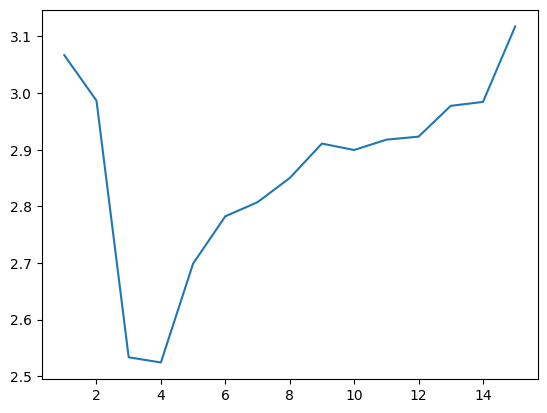

In [ ]:
# Learn and graph for different k values
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = list(range(1,16))
accuarcy_scores =[]

for i in k:

  clf = KNeighborsRegressor(n_neighbors=i)
  clf.fit(X_train_scaled, y_train)

  y_pred = clf.predict(X_test_scaled)
  score = mean_absolute_error(y_test, y_pred)
  accuarcy_scores.append(score)

plt.plot(k, accuarcy_scores)

Discussion

It looks like the model performed best when there was only k = 3 or 4. There is a huge plummet from 2 to 3 showing that it probably is best around 3; however, going to 4 does show a slight lower MSE. After 4, the model does progressively worse and worse.

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1
- Use your own choice for k and other parameters

In [ ]:
# Train/Predict lymph with your own distance metric
lymph_data, meta = arff.loadarff('lymph.arff.txt')
lymph_df = pd.DataFrame(lymph_data)
for column in lymph_df.columns:
  if isinstance(lymph_df[column][0], np.float64):
    pass
  else:
    lymph_df[column] = lymph_df[column].astype(str) #thats a cool function

label_encoders = {}
for column in lymph_df.columns[:-1]:
    if lymph_df[column].dtype == 'object':
        encoder = LabelEncoder()
        lymph_df[column] = encoder.fit_transform(lymph_df[column])
        label_encoders[column] = encoder
X = lymph_df.iloc[:, :-1].values
y = lymph_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def mydist(x, y):

    continuous_features = [0, 8, 9, 17]
    nominal_features = [i for i in range(len(x)) if i not in continuous_features]
    distance = 0
    for i in continuous_features:
        distance += (x[i] - y[i])**2
    for i in nominal_features:
        if x[i] != y[i]:
            distance += 1
    return np.sqrt(distance)

clf = KNeighborsClassifier(n_neighbors=3, metric=mydist)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8333333333333334


*Explain your distance metric and discuss your results*

So I'll be honest, Tyler showed us this one in class today. Well not the whole thing, but he explained how we were going to want to have the nominal distances be zero if they were the same and then we were going to want to the distance be 1 if the nominal values were different.

My model worked pretty good. It was able to predict it pretty well.

## 5. (Optional 15% extra credit) Code up your own KNN Learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results

*Discussion*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        return 0